In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/107.7 GB disk)


In [ ]:
!git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1SAWt7mfzAbgmakudFiL")
project = rf.workspace("reza-maleki-xcwsr").project("pelak-skurd")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pelak-1 in yolov8:: 100%|██████████| 2078/2078 [00:01<00:00, 1074.14it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 109MB/s]
New https://pypi.org/project/ultralytics/8.2.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/pelak-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fals

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   labels_correlogram.jpg  weights
events.out.tfevents.1723143897.81e92d48feb5.854.0  labels.jpg


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1024)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
import shutil

# مسیر فایل‌های مدل
local_last_path = 'runs/detect/train/weights/last.pt'
local_best_path = 'runs/detect/train/weights/best.pt'

# مسیر ذخیره در گوگل درایو
drive_last_path = '/content/drive/My Drive/last.pt'
drive_best_path = '/content/drive/My Drive/best.pt'

# کپی فایل‌ها به گوگل درایو
shutil.copy(local_last_path, drive_last_path)
shutil.copy(local_best_path, drive_best_path)

print("Files saved to Google Drive successfully!")

In [2]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 56.0 MB/s eta 0:00:00


In [3]:
!pip install ultralytics easyocr opencv-python



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [6]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [22]:
import cv2
import numpy as np
import torch
from deep_sort_realtime.deepsort_tracker import DeepSort


In [23]:
import os

In [24]:
images_n_vids_path = "/content/"
image_path = os.path.join(images_n_vids_path, "582581_556.jpg")
video_path = os.path.join(images_n_vids_path, "test_video_short.mp4")

In [25]:
savepath = images_n_vids_path
weights = '/content/MyDrive/MyDrive/best.pt'
device_id = 'cpu'
image_size = 640
trace = True

In [26]:
# بررسی در دسترس بودن CUDA (GPU)
cuda_available = torch.cuda.is_available()
print(f"CUDA available: {cuda_available}")

# اگر CUDA در دسترس باشد، نام دستگاه GPU را نمایش می‌دهد
if cuda_available:
    device_name = torch.cuda.get_device_name(0)
    print(f"Device name: {device_name}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
    print(f"Memory Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
else:
    print("No GPU found or CUDA is not available.")

CUDA available: False
No GPU found or CUDA is not available.


In [27]:
from ultralytics import YOLO


weights = '/content/MyDrive/MyDrive/best.pt'  
model = YOLO(weights)


device = 'cuda' if torch.cuda.is_available() else 
model.to(device)

image_size = 640

image_path = '/content/582581_556.jpg'


results = model.predict(image_path, imgsz=image_size)

for result in results:
    result.plot()  


image 1/1 /content/582581_556.jpg: 640x640 1 car, 812.4ms
Speed: 6.4ms preprocess, 812.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


In [28]:

print(dir(results[0]))


result = results[0]
boxes = result.boxes.cpu().numpy() 
print("Detected boxes:", boxes)


names = result.names  
print("Class names:", names)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'tojson', 'update', 'verbose']
Detected boxes: ultralytics.engine.results.Boxes object with attributes:

cls: array([          0], dtype=float32)
conf: array([    0.77145], dtype=float32)
data: array([[     73.197,      307.24,      188.61,      354.92,     0.77145,           0]], dtype=float32)
id: None
is_track: False
orig_shape: (540, 540)
shape: (1, 6)
xywh: array([[      130.9,  

In [29]:
image = cv2.imread(image_path)


for result in results:
    boxes = result.boxes  
    for box in boxes:
        box_data = box.xyxy.cpu().numpy()  
        print("Box data:", box_data)  

Box data: [[     73.197      307.24      188.61      354.92]]


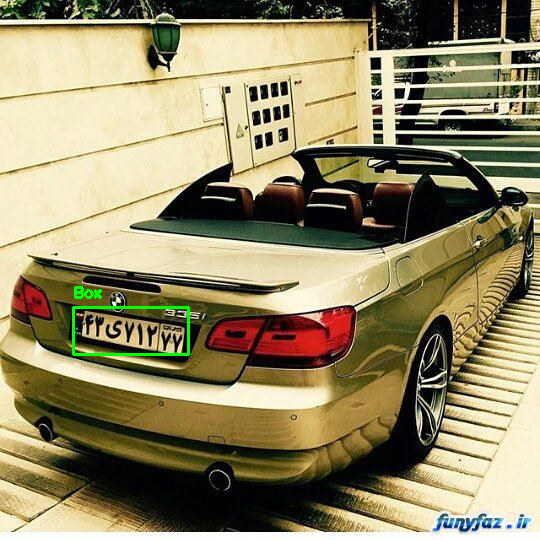

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread(image_path)


for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  
    for box in boxes:
        
        x1, y1, x2, y2 = map(int, box[:4])
        
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        cv2.putText(image, f'Box', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(image)

In [31]:
cv2.imwrite('/content/detected_objects.jpg', image)

True